# 7. Series Temporais 

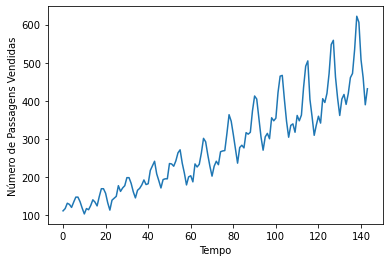

In [1]:
import pandas #utilizada para tratar os dataframes
import matplotlib.pyplot as plt  # utilizada para criar os gráficos
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python') #lê o banco de dados dos passageiros
plt.plot(dataset)  #realiza o plot do gráfico
plt.xlabel("Tempo")
plt.ylabel("Número de Passagens Vendidas")
plt.show()

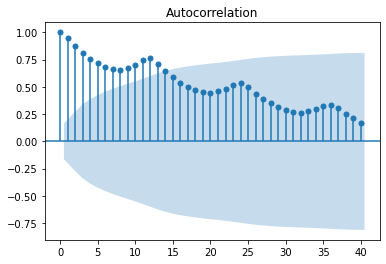

In [2]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(dataset.values.squeeze(), lags=40)
plt.show()

In [4]:
!pip install keras 

#### Bibliotecas utilizadas para a construção dos modelos de previsão de vendas de passagens

In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### Normalizzação do banco de dados, necessário para que os algoritmos possam ter um comportamento mais "previsível"

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
dataset = scaler.fit_transform(dataset) # aplica a escala

#### Divide o conjunto de dados em treinamento e teste 

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


#### Cria a matriz necessária para a entrada de dados

In [8]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

#### Cria o reshape para que os dados estejam em um formato ideal para entrada

In [9]:
look_back = 1  # será utilizado apenas um passo anterior para a previsão do futuro
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Cria o modelo utilizando redes recorrentes e o LSTM

In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#### Realiza o treinamento o modelo de previsão

In [11]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 5s - loss: 0.0354
Epoch 2/100
94/94 - 0s - loss: 0.0167
Epoch 3/100
94/94 - 0s - loss: 0.0124
Epoch 4/100
94/94 - 0s - loss: 0.0113
Epoch 5/100
94/94 - 0s - loss: 0.0105
Epoch 6/100
94/94 - 0s - loss: 0.0095
Epoch 7/100
94/94 - 0s - loss: 0.0085
Epoch 8/100
94/94 - 0s - loss: 0.0075
Epoch 9/100
94/94 - 0s - loss: 0.0066
Epoch 10/100
94/94 - 0s - loss: 0.0057
Epoch 11/100
94/94 - 0s - loss: 0.0049
Epoch 12/100
94/94 - 0s - loss: 0.0042
Epoch 13/100
94/94 - 0s - loss: 0.0036
Epoch 14/100
94/94 - 0s - loss: 0.0031
Epoch 15/100
94/94 - 0s - loss: 0.0027
Epoch 16/100
94/94 - 0s - loss: 0.0025
Epoch 17/100
94/94 - 0s - loss: 0.0023
Epoch 18/100
94/94 - 0s - loss: 0.0022
Epoch 19/100
94/94 - 0s - loss: 0.0021
Epoch 20/100
94/94 - 0s - loss: 0.0021
Epoch 21/100
94/94 - 0s - loss: 0.0020
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

#### Realiza as previsões

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#### Coloca os dados no formato original

In [13]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#### Calcula o MSE 

In [14]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score de Treinamento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score de Teste: %.2f RMSE' % (testScore))

Score de Treinamento: 22.98 RMSE
Score de Teste: 49.25 RMSE


#### Realiza a mudança dos dados para a previsão

In [15]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift para os dados de teste
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

#### Realiza o plot dos dados de previsão e o real

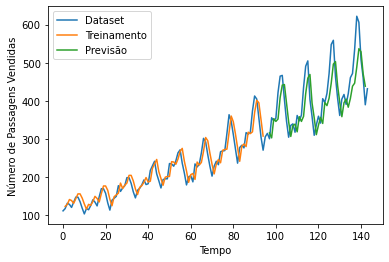

In [16]:
plt.plot(scaler.inverse_transform(dataset),label='Dataset')
plt.plot(trainPredictPlot, label='Treinamento')
plt.plot(testPredictPlot,label='Previsão')
plt.xlabel("Tempo")
plt.ylabel("Número de Passagens Vendidas")
plt.legend()
plt.show()